Photons are not equally distributed

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from strawberryfields.decompositions import williamson, bloch_messiah
from thewalrus.quantum import probabilities

# 3b

In [6]:
dir = "<replace/with/your/own/file/directory>"
cov = np.load(dir + "cov.npy")
sq_cov = np.load(dir + "sq_cov.npy")
thermal_cov = cov - sq_cov
thermal_cov = thermal_cov + np.eye(len(thermal_cov)) * np.abs(np.min(np.linalg.eigvalsh(thermal_cov))) * 1.00001
M = len(cov) // 2

D, S = williamson(sq_cov)
u, s, v = bloch_messiah(S)
sq_array = np.log(np.diag(s)) 

thermal_cov2 = u.T @ thermal_cov @ u 
sqrtW = np.linalg.cholesky(thermal_cov2) 

cutoff = 14 
tot_probs = [] 
for _ in tqdm(range(1000)):
    pure_mu = sqrtW @ np.random.normal(size=2 * M) 
    r = sq_array[0]
    probs = probabilities(pure_mu[[0, M]], np.diag(np.exp([2 * r, -2 * r])), cutoff) 
    for i in range(1, M):
        r = sq_array[i]
        probs = np.convolve(probs, probabilities(pure_mu[[i, i + M]], np.diag(np.exp([2 * r, -2 * r])), cutoff))
    tot_probs.append(probs)
tot_probs = np.array(tot_probs)

100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 114.96it/s]


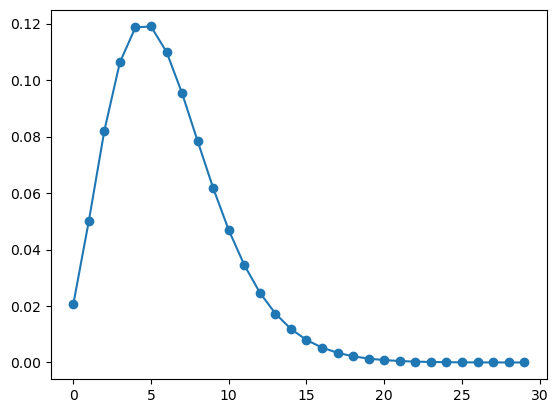

In [7]:
plt.plot(np.average(tot_probs, axis = 0)[:30], '-o')